In [2]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
dep_path = "../MOD/Julia/"
include("$(dep_path)NewTypes.jl")
include("$(dep_path)BitStringOps.jl")
include("$(dep_path)Measurements.jl")
include("$(dep_path)MICModels.jl")
include("$(dep_path)ModelRuns.jl")
include("$(dep_path)HelperTools.jl")
include("$(dep_path)Iterators.jl")
include("$(dep_path)ZassenhausFull.jl");

# Visualisation playground

1. Initialise a late-time monitored TC state, using Jovan's phase diagram to choose parameters
2. Check if the origin is correlated with other points. If not, re-run the whole thing until it is.
3. If so, you can start investigating the stabilisers.

In [3]:
# parameters
p_f = 0.5
p_b = 0.15
p_tc = 1 - p_f - p_b

0.35

In [8]:
# Take a toric code in the bosonic condensing phase (code from Jovan)
L = 9
d = 3 # thickness of subdivision

system = Init_EdgeSquareLattice_KitaevDoNuT(L, d)
e_deformator = get_e_deformator(system)
f_deformator = get_f_deformator(system)

t_evol = 500

stab_distro = Categorical([p_tc/2, p_tc/2, p_b, 0, p_f])
state = toric_code_GS(system)

state = iterate_measurements_only_fast!(state, system, () -> toric_code(system, stab_distro), t_evol)

display(general_zassenhaus_correlator(state, system, get_f_representative, f_deformator))

9×9 Matrix{Int64}:
 1  0  1  1  0  1  1  1  1
 1  1  1  0  1  1  1  1  1
 1  1  1  0  0  1  1  1  1
 1  1  0  1  1  1  1  1  1
 0  1  0  1  1  1  1  0  1
 1  1  0  1  1  1  1  1  1
 1  1  1  1  1  1  0  0  1
 1  1  1  1  0  1  1  1  0
 1  1  1  1  0  1  1  1  0

## All stabilizers
it may be instructive to just print all stabilizers. There are $2L^2 = 162$ of them

In [ ]:
# for stab in stabilizerview(state)
#     visualise_the_stabiliser_dual(stab,system)
# end

## Stabilizers between correlated points
Between the origin and any point that has a 1 in the above matrix we can obtain the specific stabilizers that connect it. Either several of them with <code>condensation_strings_full</code> or just one of them with <code>condensation_string_short</code>.

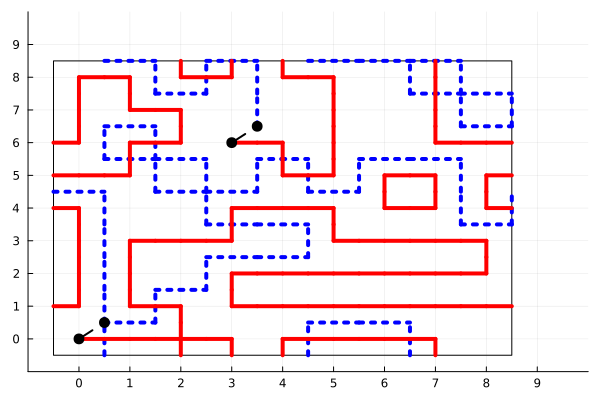

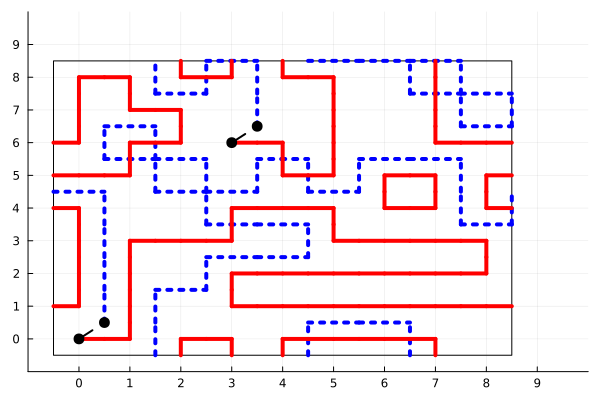

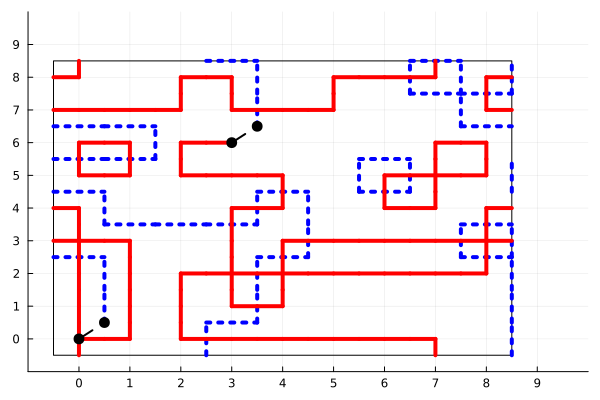

In [ ]:
# Several strings between two points
r_x = 3
r_y = 6

many_strings = condensation_strings_full((r_x, r_y), state, system, get_f_representative, f_deformator)
for stab in many_strings
    visualise_the_stabiliser_dual(stab, system, [(0,0), (r_x,r_y)])
end

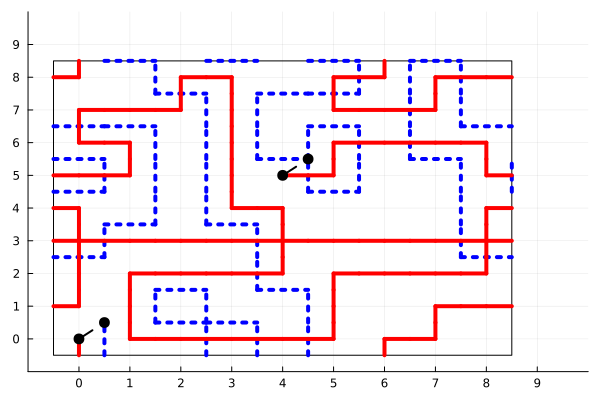

In [16]:
# A single string between two points
r_x = 4
r_y = 5

string = condensation_string_short((r_x, r_y), state, system, get_f_representative, f_deformator)

visualise_the_stabiliser_dual(string, system, [(0,0), (r_x,r_y)])
